<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/brief_fao_couleur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief FAO

Graphique Pareto malnutrition, population, densité population


In [46]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

filecsv = ['https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_animal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_cereal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_population.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_sous_alimentation.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_vegetal.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_superficie.csv',
           'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_continent.csv'
           ]

# continent_csv = 'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_continent.csv'

#print(f'list : {filecsv}')

blabla = len('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_')
conn = sqlite3.connect('bdd.sqlite')
print(blabla)
'''
to_sql()
read_sql_query()
conn.execute("SELECT/INSERT/...")
'''

names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']

for i in filecsv:
    if i != 'https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_continent.csv':
      #print(i[79:-4])
      df_tabs = pd.read_csv(i, names = names, header = 0)
    else :
      df_tabs = pd.read_csv(i, header = 0)
      #df_tabs.index = df_tabs['Code Pays']
    df_tabs.to_sql(i[blabla:-4], con=conn, if_exists='replace')
      #crée un fichier bdd.sqlite avec nos 5 tables
      #print(i[38:-4])
    


74


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [47]:
conn = sqlite3.connect('bdd.sqlite')

"""
df_population = pd.read_sql_query('''select Pays,"Code Pays",Valeur AS valeur_population
                           from population;''', con=conn)
#print(df_population)

df_cereal = pd.read_sql_query('''select "Code Pays",
                              Valeur AS valeur_cereal from cereal where Élément='Production' AND
                              Produit='Blé' ORDER BY "Code Pays";''', con=conn)
#print(df_cereal)
"""


df_graph = pd.read_sql_query('''SELECT cereal.Pays,
                             population."Code Pays",
                             population.Valeur AS valeur_population,
                             cereal.Valeur AS valeur_cereal,
                             superficie.Valeur AS valeur_superficie,
                             sous_alimentation.Valeur AS valeur_sous_alimentation,
                             continent."Groupe de pays",
                             continent."Code Groupe de pays"
                             
                             FROM population
                             
                             INNER JOIN sous_alimentation
                             ON (population."Code Pays" = sous_alimentation."Code Pays")
                             
                             INNER JOIN superficie
                             ON (population."Code Pays" = superficie."Code Pays")

                             INNER JOIN cereal
                             ON (population."Code Pays" = cereal."Code Pays")

                             INNER JOIN continent
                             ON (population."Code Pays" = continent."Code Pays")

                             WHERE (cereal.Élément='Production'
                             AND cereal.Produit='Blé'
                             AND cereal.Valeur > 0
                             AND sous_alimentation.Valeur > 0
                             AND superficie.Année = 2013
                             AND superficie.Valeur > 0
                             AND "Code Groupe de pays"%100==0 
                             AND "Code Groupe de pays" <> 5000 )
                             
                             ORDER BY population."Code Pays";''', con=conn)

df_graph['valeur_densité'] = df_graph['valeur_population'] / df_graph['valeur_superficie']

df_graph

,Pays,Code Pays,valeur_population,valeur_cereal,valeur_superficie,valeur_sous_alimentation,Groupe de pays,Code Groupe de pays,valeur_densité
0,Arménie,1,2977,312.0,2974.00,0.1,Asie,5300,1.001009
1,Afghanistan,2,30552,5169.0,65286.00,8.1,Asie,5300,0.467972
2,Albanie,3,3173,294.0,2875.00,0.2,Europe,5400,1.103652
3,Algérie,4,39208,3299.0,238174.00,1.8,Afrique,5100,0.164619
4,Angola,7,21472,4.0,124670.00,8.0,Afrique,5100,0.172231
...,...,...,...,...,...,...,...,...,...
59,Yémen,249,24407,232.0,52797.00,7.1,Asie,5300,0.462280
60,Zambie,251,14539,274.0,75261.00,7.0,Afrique,5100,0.193181
61,Serbie,272,9511,2690.0,8836.00,0.5,Europe,5400,1.076392
62,Soudan,276,37964,265.0,187800.00,9.3,Afrique,5100,0.202151


In [52]:
import random

colors = {
    '5100': ['yellow'],
    '5200': ['indigo'],
    '5300': ['black'],
    '5400': ['turquoise'],
    '5500': ['silver'],
    '5600': ['beige']
}


selected_colors = {code: random.choice(color_list) for code, color_list in colors.items()}


color1 = [selected_colors[code] for code in df_graph['Code Groupe de pays']]


def my_graphs(df_graph):
  for z in ['valeur_sous_alimentation', 'valeur_population', 'valeur_superficie']:
    #sort DataFrame by count descending
    df_graph = df_graph.sort_values(by=z, ascending=False)

    #add column to display cumulative percentage
    df_graph['cumperc'] = df_graph[z].cumsum()/df_graph[z].sum()*100

    #define aesthetics for plot
    
    color2 = 'red'
    line_size = 4

    #create basic bar plot
    fig, ax = plt.subplots()
    ax.bar(df_graph.Pays, df_graph[z], color=color1)
    fig.set_size_inches(18.5, 10.5)
    plt.xticks(rotation=90, ha="right", fontsize=8)
    plt.title(z[7:] ,fontsize=20)
    plt.xlabel('Pays',fontsize=20)
    plt.ylabel('Valeurs',fontsize=20)
    #add cumulative percentage line to plot
    ax2 = ax.twinx()
    ax2.plot(df_graph.Pays, df_graph['cumperc'], color=color2, marker="D", ms=line_size)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    #specify axis colors
    ax.tick_params(axis='y', colors=color1)
    ax2.tick_params(axis='y', colors=color2)

    #display Pareto chart
    plt.show()

KeyError: ignored

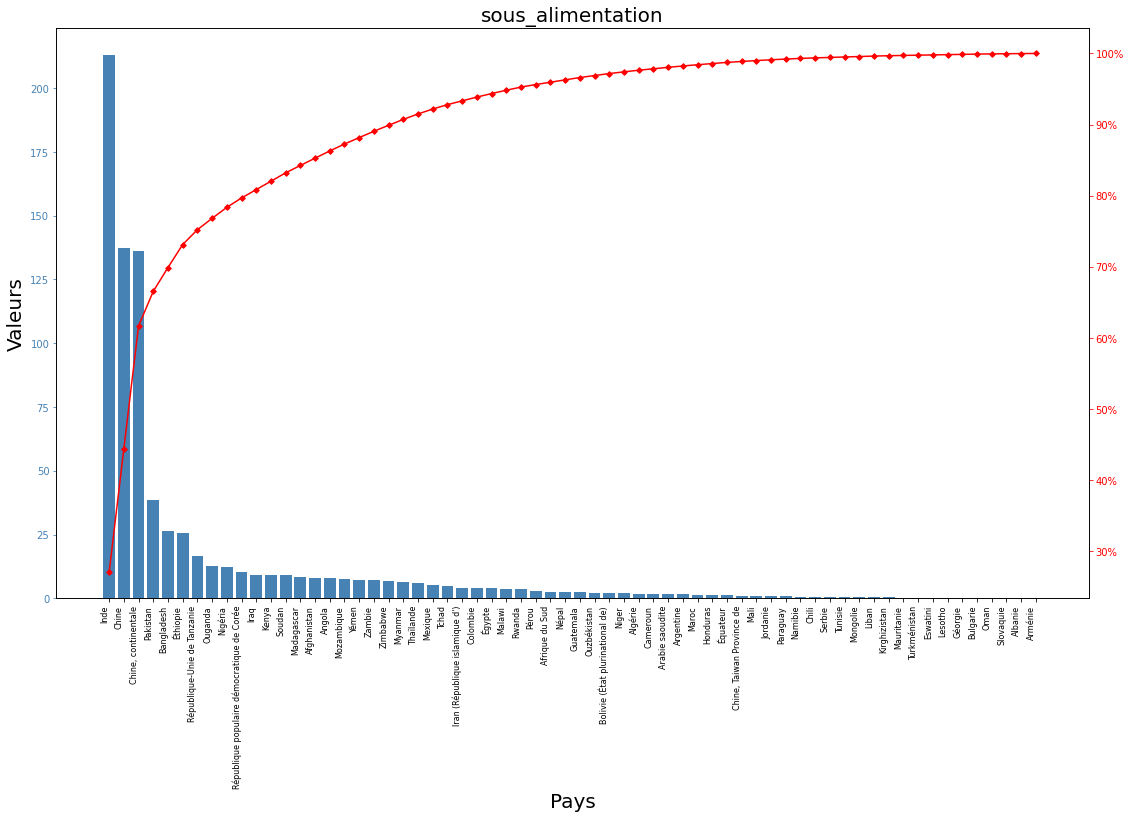

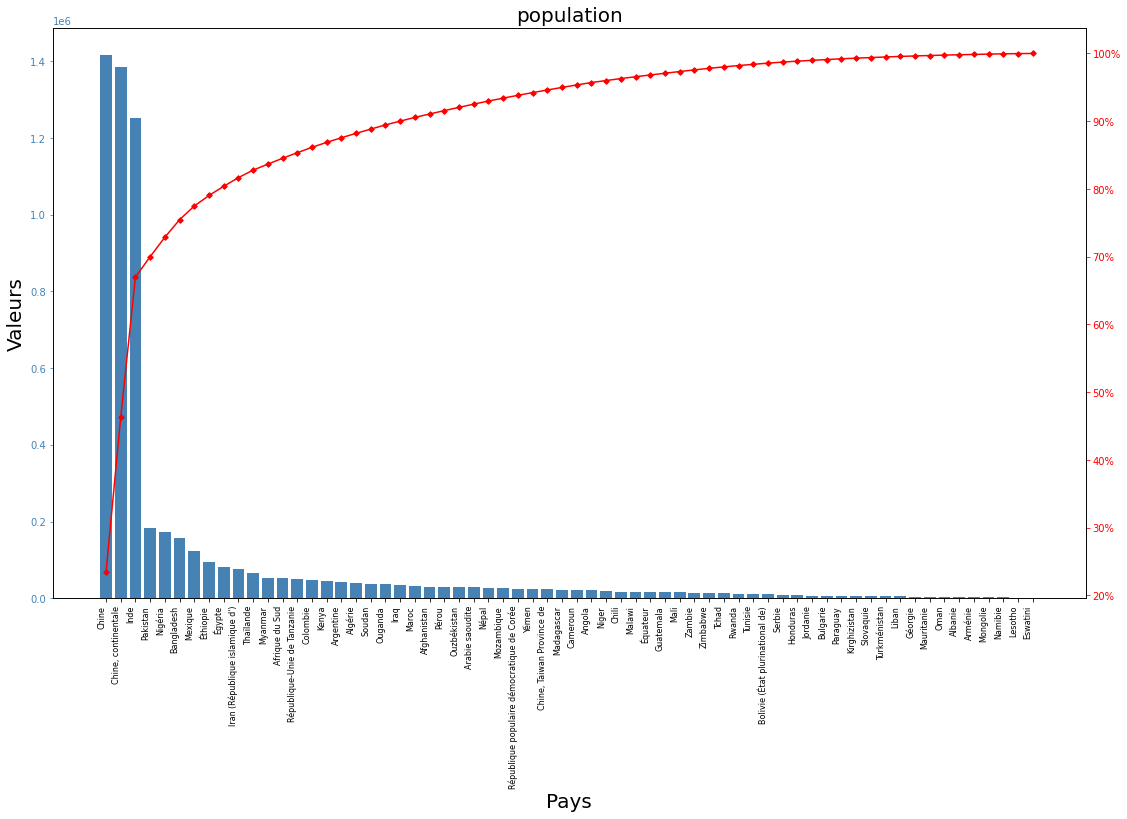

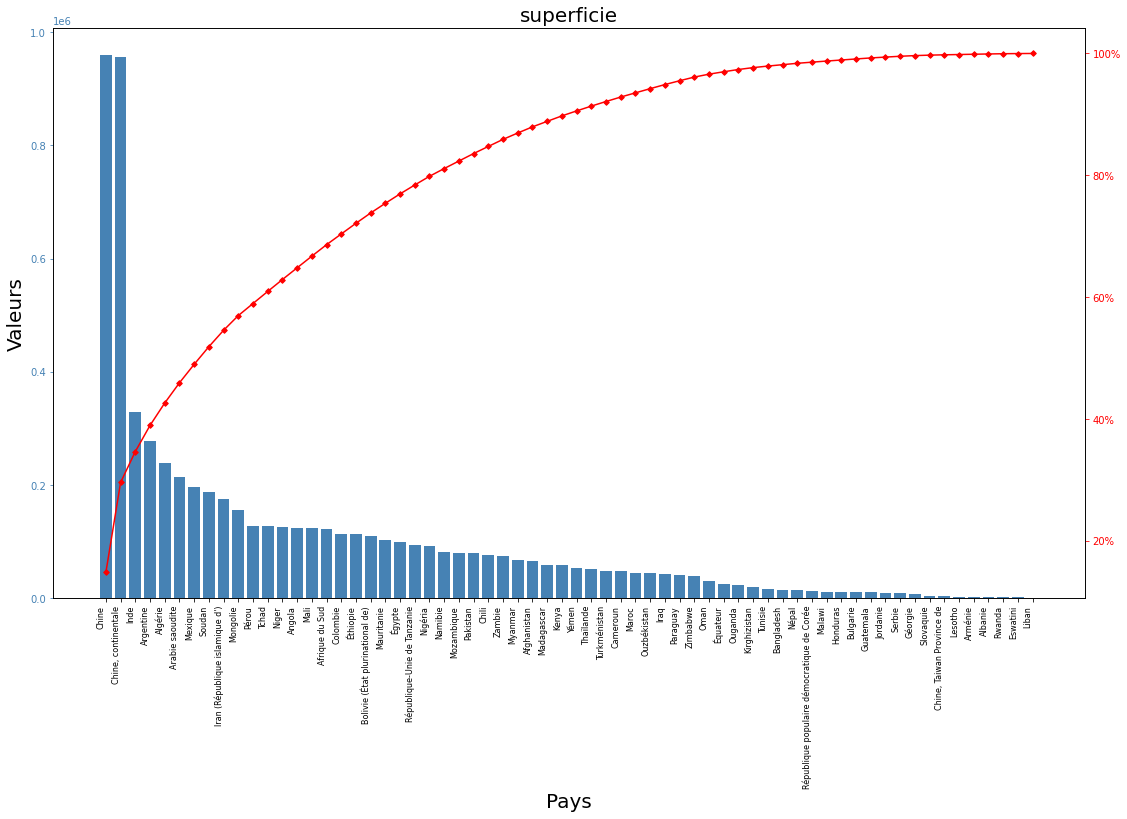

In [49]:
my_graphs(df_graph)